# SD212: Graph mining
## Lab 3: PageRank

In this lab, you will learn to compute, use and interpret various [PageRank](https://en.wikipedia.org/wiki/PageRank) scores.

## Import

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np
from scipy import sparse

In [3]:
from sknetwork.data import load_netset, linear_graph, miserables
from sknetwork.linalg import normalize
from sknetwork.ranking import PageRank, BiPageRank, top_k
from sknetwork.visualization import svg_graph

## Data

We will work on the following graphs (see the [NetSet](https://netset.telecom-paris.fr/) collection for details):
* Openflights (graph)
* WikiVitals (digraph)
* Cinema (bigraph)

In [4]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')
cinema = load_netset('cinema')

Parsing files...
Done.
Parsing files...
Done.
Parsing files...
Done.


## 1. Graphs

The PageRank corresponds to the stationary distribution of a random walk with restart probability $1-\alpha$. Unless otherwise specified, we take the default value $\alpha = 0.85$ and the restart probability distribution is uniform over the set of nodes.

In [11]:
A = np.array([[0,1,1,0,0,0],
             [1,0,1,0,0,0],
             [1,1,0,1,0,0],
             [0,0,1,0,1,1],
             [0,0,0,1,0,0],
             [0,0,0,1,0,0]], dtype=int)

In [13]:
pagerank = PageRank(damping_factor=0.01)
scores = pagerank.fit_transform(A)
np.argmax(scores)

3

## Linear graph

Consider a linear graph:

In [5]:
n = 10

In [79]:
graph = linear_graph(n, True)
adjacency = graph.adjacency
position = graph.position

In [80]:
image = svg_graph(adjacency, position, names=np.arange(n))

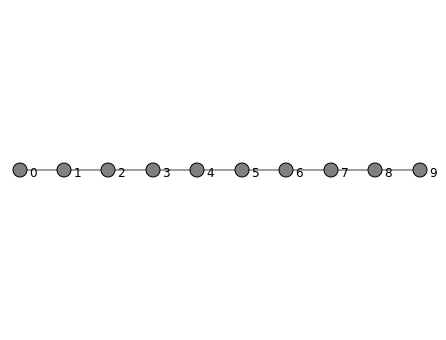

In [81]:
SVG(image)

## To do

* What are the two best ranked nodes? Try with different values of $\alpha$ and interpret the results.
* What is the **exact** PageRank vector when $\alpha=1$? You need to compute it!

In [82]:
#pagerank = PageRank(damping_factor=0.9999999999999, solver='lanczos')
pagerank = PageRank(damping_factor=0, solver='lanczos')
#pagerank = PageRank(damping_factor=0.85, solver='lanczos')

In [83]:
scores = pagerank.fit_transform(adjacency)
scores

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [84]:
image = svg_graph(adjacency, position, names=np.arange(n), scores=scores)

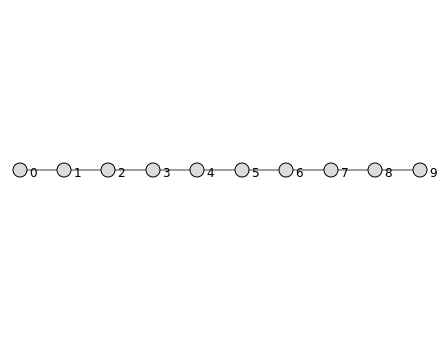

In [85]:
SVG(image)

## Les Misérables


In [142]:
graph = miserables(True)

In [143]:
adjacency = graph.adjacency
position = graph.position
names = graph.names

In [144]:
image = svg_graph(adjacency, position, names, scale=2)

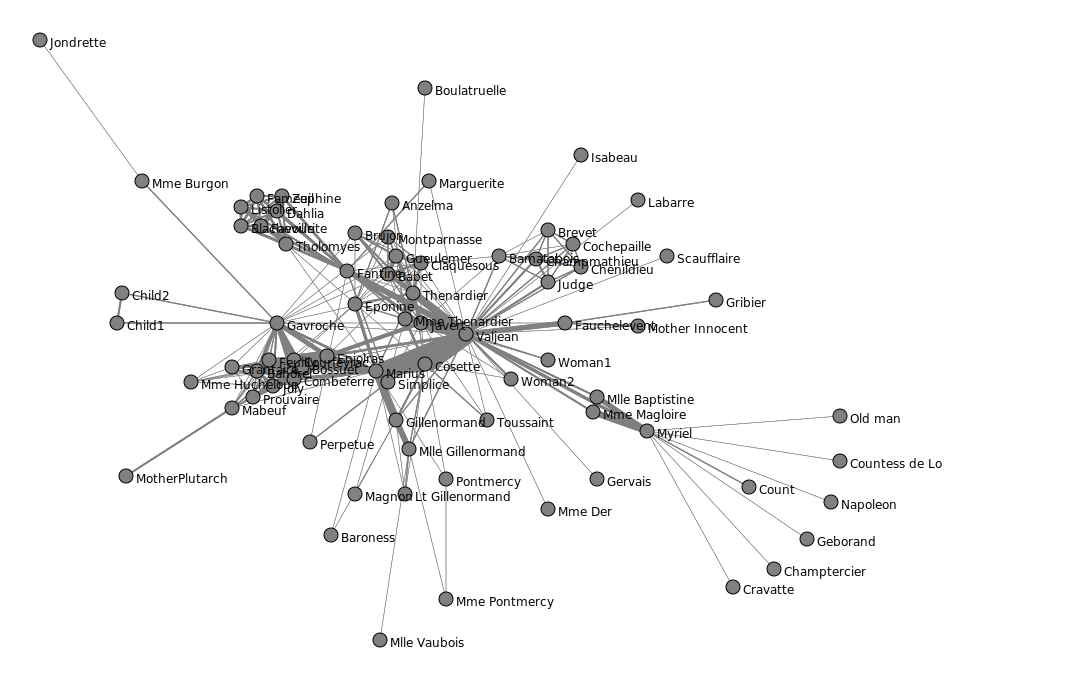

In [145]:
SVG(image)

## To do

* Display the graph with PageRank scores.
* List the 10 best ranked characters.
* Compare with the 10 nodes of highest degrees and the 10 nodes of highest weights.
* Try different values of $\alpha$ (e.g., 0.1, 0.9, 0.99) and interpret the results.

In [146]:
pagerank = PageRank(damping_factor=0.85, solver='lanczos')

In [147]:
scores = pagerank.fit_transform(adjacency)

In [148]:
# scores in log scale are more visible
image = svg_graph(adjacency, position, names, scores=np.log(scores), scale=2)

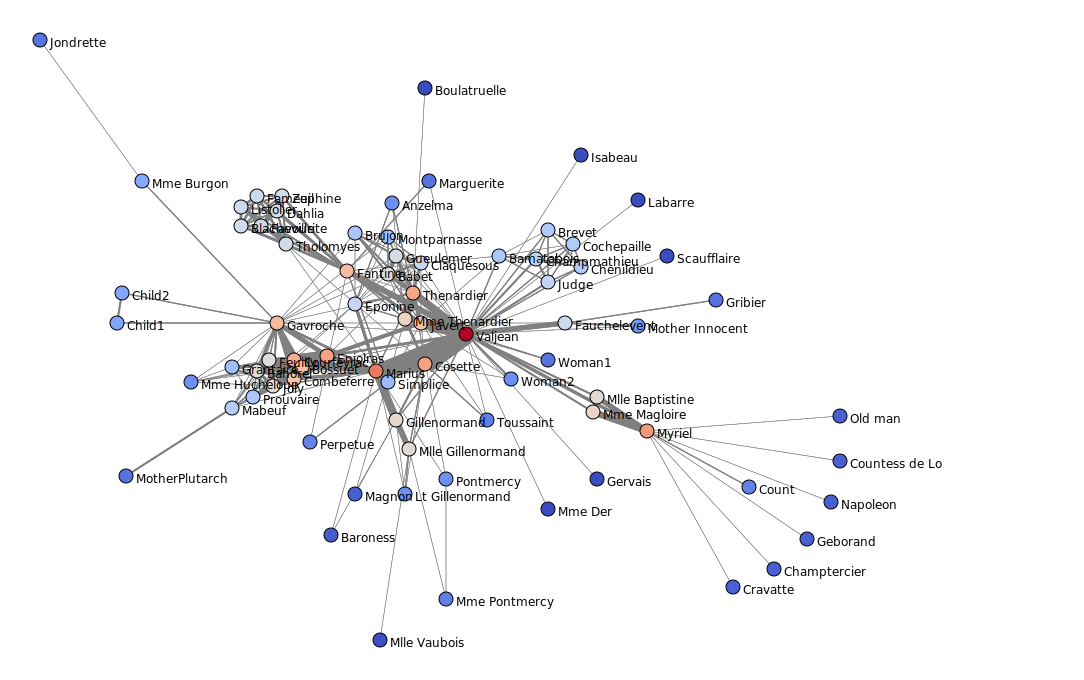

In [149]:
SVG(image)

In [150]:
top_nodes = top_k(scores, 10)

In [165]:
for i, node in enumerate(top_nodes):
    print(i + 1, "{:.2%}".format(scores[node]), names[node])

1 9.96% Valjean
2 5.17% Marius
3 3.92% Myriel
4 3.69% Cosette
5 3.66% Enjolras
6 3.57% Thenardier
7 3.30% Courfeyrac
8 2.83% Gavroche
9 2.72% Fantine
10 2.68% Javert


In [162]:
degrees = (adjacency > 0) @ np.ones(adjacency.shape[1])
degrees /= sum(degrees)
weights =  adjacency @ np.ones(adjacency.shape[1])
weights /= sum(weights)

top_nodes_degrees = top_k(degrees, 10)
top_nodes_weights = top_k(weights, 10)

In [174]:
import pandas as pd
df = pd.DataFrame()
df["rank"] = np.arange(1,11)
df["scores"] = names[top_nodes]
df["scores_p"] = scores[top_nodes]
df["degrees"] = names[top_nodes_degrees]
df["degrees_p"] = degrees[top_nodes_degrees]
df["weights"] = names[top_nodes_weights]
df["weights_p"] = weights[top_nodes_weights]

In [175]:
df

,rank,scores,scores_p,degrees,degrees_p,weights,weights_p
0,1,Valjean,0.099558,Valjean,0.070866,Valjean,0.096341
1,2,Marius,0.051668,Gavroche,0.043307,Marius,0.063415
2,3,Myriel,0.039232,Marius,0.037402,Enjolras,0.055488
3,4,Cosette,0.036910,Javert,0.033465,Courfeyrac,0.051220
4,5,Enjolras,0.036617,Thenardier,0.031496,Cosette,0.041463
5,6,Thenardier,0.035682,Enjolras,0.029528,Combeferre,0.041463
6,7,Courfeyrac,0.032999,Fantine,0.029528,Bossuet,0.040244
7,8,Gavroche,0.028303,Bossuet,0.025591,Thenardier,0.037195
8,9,Fantine,0.027164,Courfeyrac,0.025591,Gavroche,0.034146
9,10,Javert,0.026823,Joly,0.023622,Fantine,0.028659


I love THIS!

For different values of $\alpha$:

In [221]:
pagerank = PageRank(damping_factor=0.5, solver='lanczos')
scores = pagerank.fit_transform(adjacency)
top_nodes = top_k(scores, 10)

In [222]:
df["scores_0.5"] = names[top_nodes]
df["scores_p_0.5"] = scores[top_nodes]

In [223]:
df

,rank,scores,scores_p,degrees,degrees_p,weights,weights_p,scores_1,scores_p_1,scores_0.1,scores_p_0.1,scores_0.5,scores_p_0.5,scores_0.7,scores_p_0.7
0,1,Valjean,0.097804,Valjean,0.070866,Valjean,0.096341,Valjean,0.096358,Valjean,0.026454,Valjean,0.071946,Valjean,0.089833
1,2,Marius,0.062430,Gavroche,0.043307,Marius,0.063415,Marius,0.063404,Myriel,0.021284,Myriel,0.040855,Myriel,0.043058
2,3,Enjolras,0.053173,Marius,0.037402,Enjolras,0.055488,Enjolras,0.055463,Thenardier,0.016118,Marius,0.031721,Marius,0.042322
3,4,Courfeyrac,0.048907,Javert,0.033465,Courfeyrac,0.051220,Courfeyrac,0.051195,Marius,0.015858,Thenardier,0.027361,Thenardier,0.032323
4,5,Cosette,0.041409,Thenardier,0.031496,Cosette,0.041463,Cosette,0.041463,Gavroche,0.015150,Cosette,0.023435,Cosette,0.030708
5,6,Combeferre,0.039555,Enjolras,0.029528,Combeferre,0.041463,Combeferre,0.041443,Fantine,0.014955,Gavroche,0.022979,Enjolras,0.028583
6,7,Bossuet,0.038421,Fantine,0.029528,Bossuet,0.040244,Bossuet,0.040224,Mlle Gillenormand,0.014547,Fantine,0.022030,Gavroche,0.026099
7,8,Thenardier,0.037317,Bossuet,0.025591,Thenardier,0.037195,Thenardier,0.037197,Enjolras,0.014306,Enjolras,0.022016,Courfeyrac,0.025869
8,9,Gavroche,0.033236,Courfeyrac,0.025591,Gavroche,0.034146,Gavroche,0.034136,Cosette,0.014125,Courfeyrac,0.020359,Fantine,0.025077
9,10,Javert,0.028692,Joly,0.023622,Fantine,0.028659,Javert,0.028659,Courfeyrac,0.014087,Javert,0.020051,Javert,0.023847


In [215]:
#frames = [df, df_1]
#pd.concat(frames, keys=["default alpha", "alpha=1"])

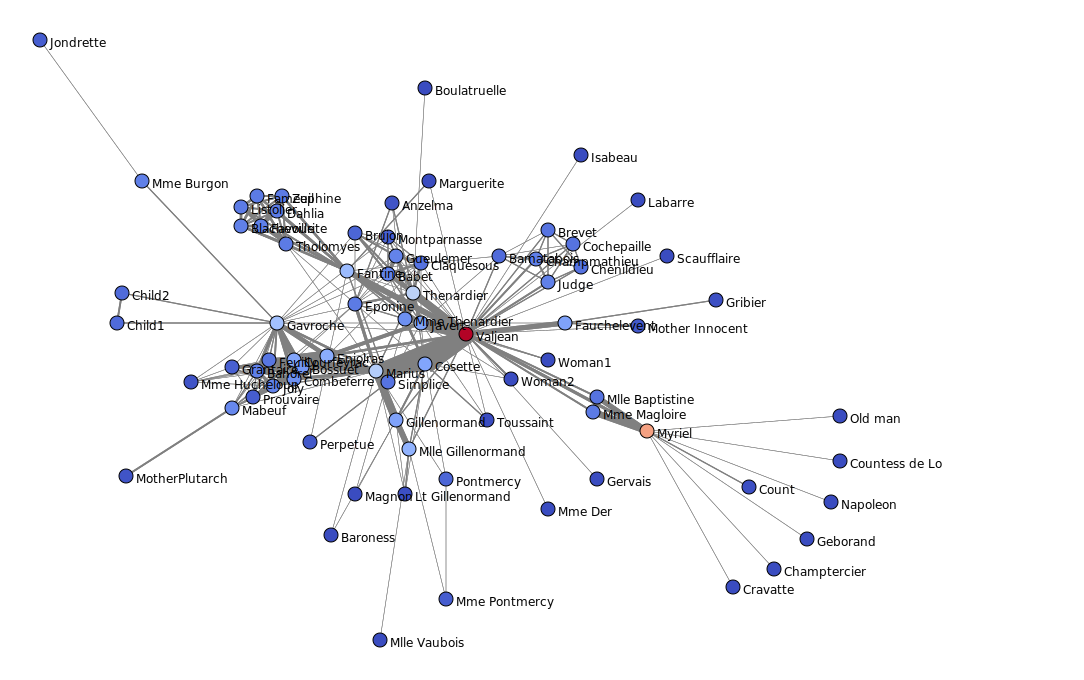

In [217]:
# graph for alpha = _
image = svg_graph(adjacency, position, names, scores=np.log(scores), scale=2)
SVG(image)

## Openflights


In [250]:
graph = openflights

In [251]:
adjacency = graph.adjacency
position = graph.position
names = graph.names

In [252]:
image = svg_graph(adjacency, position, width=800, height=400, display_node_weight=True, display_edges=False)

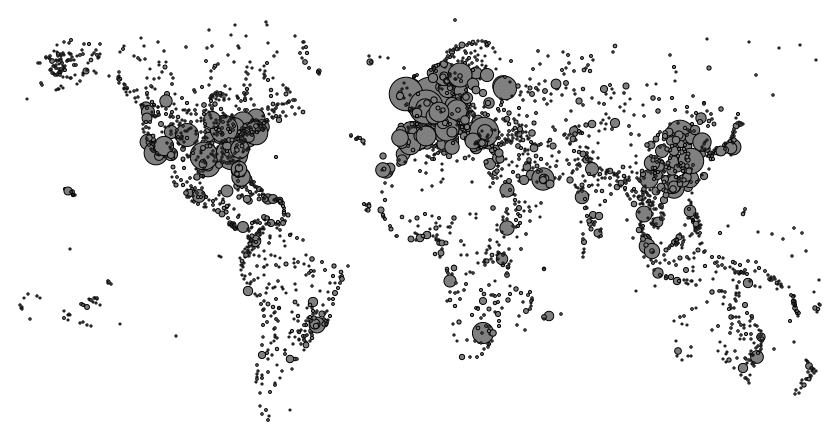

In [253]:
SVG(image)

## To do

* Display the same world map with PageRank scores.
* List the 10 best ranked airports, and compare with the 10 airports of highest traffic.
* Display the world map with Personalized PageRank scores, starting from Tokyo international airport.
* List the corresponding 10 best ranked airports.

In [254]:
pagerank = PageRank()

In [255]:
scores = pagerank.fit_transform(adjacency)

In [256]:
image = svg_graph(adjacency, position, scores=np.log(scores), # node_order is used to decide what node overlays the other
                  node_order=np.argsort(scores), width=800, height=400,
                  display_node_weight=True, display_edges=False)

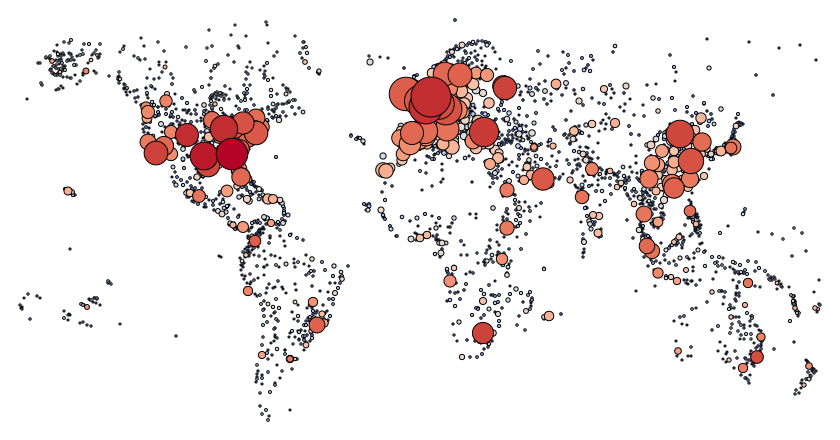

In [257]:
SVG(image)

In [258]:
top_nodes = top_k(scores, 10)

In [259]:
for i, node in enumerate(top_nodes):
    print(i + 1, "{:.2%}".format(scores[top_nodes[i]]), names[node])

1 0.51% Hartsfield Jackson Atlanta International Airport
2 0.47% Dallas Fort Worth International Airport
3 0.44% Amsterdam Airport Schiphol
4 0.43% Chicago O'Hare International Airport
5 0.43% Denver International Airport
6 0.41% Charles de Gaulle International Airport
7 0.40% Atatürk International Airport
8 0.38% OR Tambo International Airport
9 0.38% Los Angeles International Airport
10 0.38% Domodedovo International Airport


In [260]:
traffic

array([7.65884443e-05, 1.53176889e-04, 2.75718400e-04, ...,
       3.06353777e-05, 4.59530666e-05, 1.53176889e-05])

In [261]:
traffic = adjacency.dot(np.ones(adjacency.shape[1]))
traffic /= sum(traffic)
top_nodes_traffic = top_k(traffic, 10)

In [266]:
import pandas as pd
df_flights = pd.DataFrame()
df_flights["rank"] = np.arange(1,11)
df_flights["scores"] = names[top_nodes]
df_flights["scores_p"] = scores[top_nodes]
df_flights["traffic"] = names[top_nodes_traffic]
df_flights["traffic_p"] = traffic[top_nodes_traffic]

In [267]:
df_flights

,rank,scores,scores_p,traffic,traffic_p
0,1,Hartsfield Jackson Atlanta International Airport,0.005135,Amsterdam Airport Schiphol,0.007536
1,2,Dallas Fort Worth International Airport,0.004719,Charles de Gaulle International Airport,0.006326
2,3,Amsterdam Airport Schiphol,0.004432,Dublin Airport,0.006250
3,4,Chicago O'Hare International Airport,0.004329,Munich International Airport,0.005913
4,5,Denver International Airport,0.004288,Hartsfield Jackson Atlanta International Airport,0.005851
5,6,Charles de Gaulle International Airport,0.004147,London Gatwick Airport,0.005759
6,7,Atatürk International Airport,0.003967,Frankfurt am Main International Airport,0.005652
7,8,OR Tambo International Airport,0.003820,Atatürk International Airport,0.005422
8,9,Los Angeles International Airport,0.003803,Dallas Fort Worth International Airport,0.005116
9,10,Domodedovo International Airport,0.003790,Beijing Capital International Airport,0.005085


We notice how actual traffic and distribution probabilities differ.

Ex: Dublin Airport, which has the third top traffic, does not end up in the top 10 of the airports that we might likely land on!

**Personalized PageRank**

In [234]:
tokyo = 1084

In [235]:
pagerank = PageRank()

In [236]:
scores = pagerank.fit_transform(adjacency, seeds = {tokyo: 1})

In [237]:
image = svg_graph(adjacency, position, scores=np.log(scores), node_order=np.argsort(scores), width=800, height=400, display_node_weight=True, display_edges=False) 

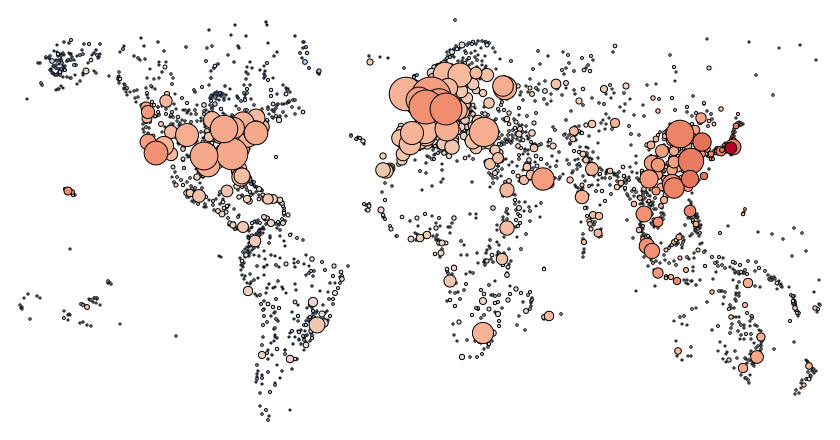

In [238]:
SVG(image)

In [241]:
print("Highest ranked nodes from Tokyo:\n")
top_nodes = top_k(scores, 10)
for i, node in enumerate(top_nodes):
    print(i + 1, "{:.2%}".format(scores[top_nodes[i]]), names[node])

Highest ranked nodes from Tokyo:

1 20.08% Tokyo Haneda International Airport
2 1.59% Incheon International Airport
3 1.46% Naha Airport
4 1.42% Taiwan Taoyuan International Airport
5 1.30% Osaka International Airport
6 1.15% Shanghai Pudong International Airport
7 1.11% New Chitose Airport
8 1.00% Kansai International Airport
9 0.97% Narita International Airport
10 0.93% Chubu Centrair International Airport


## 2. Directed graphs

## Wikipedia Vitals

In [360]:
graph = wikivitals

In [361]:
adjacency = graph.adjacency
names = graph.names

## To do

* List the 10 best ranked pages of Wikipedia Vitals.
* Compare with the 10 nodes of highest out-degrees and the 10 nodes of highest in-degrees. Interpret the results.
* Which article of Wikipedia Vitals is in the top-20 of PageRank but not in the top-20 of in-degrees?

In [362]:
pagerank = PageRank(solver='lanczos')

In [363]:
scores = pagerank.fit_transform(adjacency)

In [364]:
top_pages = top_k(scores, 10)

In [365]:
for i, node in enumerate(top_pages):
    print(i + 1, "{:.2%}".format(scores[node]), names[node])

1 0.41% Bibliothèque nationale de France
2 0.21% United States
3 0.18% Geographic coordinate system
4 0.17% The New York Times
5 0.16% France
6 0.16% India
7 0.15% Latin
8 0.15% China
9 0.14% United Kingdom
10 0.14% World War II


In [366]:
out_degrees = adjacency.dot(np.ones(adjacency.shape[1]))
out_degrees /= sum(out_degrees)
in_degrees = adjacency.T.dot(np.ones(adjacency.shape[0]))
in_degrees /= sum(in_degrees)

top_out_degrees = top_k(out_degrees, 10)
top_in_degrees = top_k(in_degrees, 10)

df_wiki = pd.DataFrame()
df_wiki["rank"] = df["rank"]
df_wiki["scores"] = names[top_pages]
df_wiki["scores_p"] = scores[top_pages]
df_wiki["out_degree"] = names[top_out_degrees]
df_wiki["out_degree_p"] = out_degrees[top_out_degrees]
df_wiki["in_degree"] = names[top_in_degrees]
df_wiki["in_degree_p"] = in_degrees[top_in_degrees]

In [367]:
df_wiki

,rank,scores,scores_p,out_degree,out_degree_p,in_degree,in_degree_p
0,1,Bibliothèque nationale de France,0.004058,Europe,0.000838,Bibliothèque nationale de France,0.004377
1,2,United States,0.002119,Modern history,0.000792,United States,0.002464
2,3,Geographic coordinate system,0.001759,History of the world,0.000792,India,0.001933
3,4,The New York Times,0.001662,France,0.000691,China,0.001860
4,5,France,0.001563,Africa,0.000663,The New York Times,0.001773
5,6,India,0.001559,History of art,0.000602,France,0.001755
6,7,Latin,0.001530,Asia,0.000595,Geographic coordinate system,0.001728
7,8,China,0.001473,Russia,0.000585,United Kingdom,0.001646
8,9,United Kingdom,0.001440,History of Europe,0.000571,World War II,0.001629
9,10,World War II,0.001431,South America,0.000568,Latin,0.001490


We notice that PageRank (page score = page importance) is more affected by in degrees than out degrees (Top 2 are the same, and all top 10 are common)

In [373]:
top_in_degrees = top_k(in_degrees, 20)
top_pages = top_k(scores, 20)

for i in range(20):
    if top_pages[i] not in top_in_degrees:
        print(names[i], "is the only website not in the top 20 of both sets.")

Mesoamerican architecture is the only website not in the top 20 of both sets.


## To do

* List the 20 closest pages to **Picasso** in Wikipedia Vitals. What is the best ranked painter other than Picasso?
* List the 20 closest pages to both **Cat** and **Dog** in Wikipedia Vitals.
* In both cases, propose a method to get the 20 closest pages **specifically** related to the target(s). <br>
**Hint:** Consider the difference between two PageRank scores.

In [376]:
picasso = 4936
pagerank = PageRank()
scores = pagerank.fit_transform(adjacency, seeds = {picasso: 1})
print("Top 20 closest pages to Picasso:\n")
top_nodes = top_k(scores, 21)
for i, node in enumerate(top_nodes):
    print(i, "{:.2%}".format(scores[top_nodes[i]]), names[node])

Top 20 closest pages to Picasso:

0 15.14% Pablo Picasso
1 0.69% Bibliothèque nationale de France
2 0.26% The New York Times
3 0.23% Paris
4 0.21% Modernism
5 0.19% Museum of Modern Art
6 0.18% Cubism
7 0.17% Avant-garde
8 0.17% Symbolism (arts)
9 0.17% Impressionism
10 0.17% Romanticism
11 0.17% Spain
12 0.17% France
13 0.17% Metropolitan Museum of Art
14 0.17% Surrealism
15 0.17% United States
16 0.16% Geographic coordinate system
17 0.16% World War II
18 0.16% Vincent van Gogh
19 0.16% Encyclopædia Britannica
20 0.16% Paul Cézanne


In [380]:
cat = 1401; dog = 1395
pagerank = PageRank()
scores = pagerank.fit_transform(adjacency, seeds = {cat: 0.5, dog: 0.5})
print("Top 20 closest pages to both Cat and Dog:\n")
top_nodes = top_k(scores, 22)
for i, node in enumerate(top_nodes):
    print(i - 1, "{:.3%}".format(scores[top_nodes[i]]), names[node])

Top 20 closest pages to both Cat and Dog:

-1 7.644% Dog
0 7.632% Cat
1 0.375% Bibliothèque nationale de France
2 0.254% Taxonomy (biology)
3 0.247% Animal
4 0.226% Mammal
5 0.199% Chordate
6 0.185% Middle Ages
7 0.182% India
8 0.176% The New York Times
9 0.175% Latin
10 0.174% China
11 0.172% Pinniped
12 0.172% United States
13 0.171% Carl Linnaeus
14 0.171% Lion
15 0.170% Bear
16 0.168% Leopard
17 0.168% Polar bear
18 0.167% Brown bear
19 0.167% Coyote
20 0.166% Wolf


## 3. Bipartite graphs

## Cinema

In [294]:
graph = cinema

In [295]:
biadjacency = graph.biadjacency
movies = graph.names_row
actors = graph.names_col

In [302]:
biadjacency.shape

(88440, 44586)

## To do

* List the top-10 movies in terms of PageRank.
* List the 5 closest movies to **Mon Oncle**. 
* List the 5 closest actors to **Catherine Deneuve**.

In [336]:
pagerank = BiPageRank()

In [337]:
pagerank.fit(biadjacency)

BiPageRank(damping_factor=0.85, solver='piteration', n_iter=10, tol=0)

In [338]:
scores = pagerank.scores_row_ # or pagerank.fit_transform(biadjacency) 
len(scores)

88440

**Top 10 movies in terms of actors that feature in movies**

In [340]:
# top 10 movies in terms of actors that feature in movies
top_movies = top_k(scores, 10)
for i, node in enumerate(top_movies):
    print(i + 1, "{:.4%}".format(scores[node]), movies[node])

1 0.0073% The Walking Dead (TV series)
2 0.0072% Tatort
3 0.0063% Twin Peaks
4 0.0060% Homeland (TV series)
5 0.0059% House of Cards (U.S. TV series)
6 0.0058% Prêt-à-Porter
7 0.0057% St. Elsewhere
8 0.0057% Peaky Blinders (TV series)
9 0.0056% Seances
10 0.0055% Arrow (TV series)


**Top 5 closest movies to Mon Oncle**

In [341]:
for i in range(len(movies)):
    if "Oncle" in movies[i]:
        print(movies[i], ":", i)

Mon Oncle : 43428


In [353]:
# top 5 closest movies to Mon Oncle
oncle = 43428
pagerank = BiPageRank()
personalized_pagerank_oncle = pagerank.fit(biadjacency, seeds_row = {oncle: 1})
scores_oncle = personalized_pagerank_oncle.scores_row_
top_movies_oncle = top_k(scores_oncle, 6)
print("Top 5 closest movies to 'Mon Oncle'")
for i, node in enumerate(top_movies_oncle):
    print(i , "{:.2%}".format(scores_oncle[node]), movies[node])

Top 5 closest movies to 'Mon Oncle'
0 38.54% Mon Oncle
1 16.60% Jour de fête
2 14.77% Cours du soir
3 14.77% Gai dimanche
4 2.10% Touchez pas au grisbi
5 2.00% The Discreet Charm of the Bourgeoisie


In [352]:
scores_oncle_actor = personalized_pagerank_oncle.scores_col_
top_actors_oncle = top_k(scores_oncle_actor, 6)
print("Top 5 closest actors according to movie 'Mon Oncle'\n")
for i, node in enumerate(top_actors_oncle):
    print(i , "{:.2%}".format(scores_oncle_actor[node]), actors[node])

Top 5 closest actors according to movie 'Mon Oncle'

0 85.42% Jacques Tati
1 9.79% Paul Frankeur
2 0.55% Luis Buñuel
3 0.42% Jean Gabin
4 0.40% Lino Ventura
5 0.40% Laurent Terzieff


When googling Jacque Tati, we got the movie Mon Oncle as the second result, which explains our findings
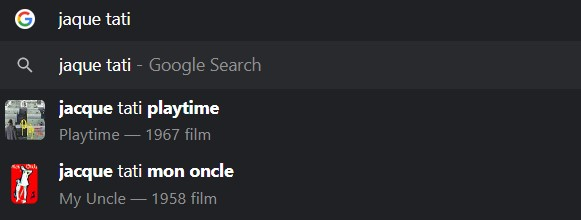

**Top 5 closest actors to 'Catherine Deneuve'**

In [345]:
len(pagerank.scores_col_)

44586

In [357]:
for i in range(len(actors)):
    if "Dene" in actors[i]:
        print(actors[i], ":", i)

Catherine Deneuve : 2173
Georges Deneubourg : 39885


In [358]:
# top 5 closest actors to Catherine Deneuve
deneuve = 2173
pagerank = BiPageRank()
personalized_pagerank_deneuve = pagerank.fit(biadjacency, seeds_col = {deneuve: 1})
scores_deneuve = personalized_pagerank_deneuve.scores_col_
top_actors_deneuve = top_k(scores_deneuve, 6)
print("Top 5 closest actors to 'Catherine Deneuve'")
for i, node in enumerate(top_actors_deneuve):
    print(i , "{:.2%}".format(scores_deneuve[node]), actors[node])

Top 5 closest actors to 'Catherine Deneuve'
0 33.15% Catherine Deneuve
1 1.04% Marcello Mastroianni
2 0.96% Gérard Depardieu
3 0.83% Michel Piccoli
4 0.66% Chiara Mastroianni
5 0.52% Jean-Louis Trintignant


In [359]:
scores_deneuve_movie = personalized_pagerank_deneuve.scores_row_
top_movies_deneuve = top_k(scores_deneuve_movie, 6)
print("Top 5 closest movies according to 'Catherine Deneuve'\n")
for i, node in enumerate(top_movies_deneuve):
    print(i , "{:.2%}".format(scores_deneuve_movie[node]), movies[node])

Top 5 closest movies according to 'Catherine Deneuve'

0 0.83% The Umbrellas of Cherbourg
1 0.78% The Beloved (2011 film)
2 0.77% Standing Tall
3 0.75% In the Courtyard
4 0.74% A Christmas Tale
5 0.74% Belle maman


We found similar results

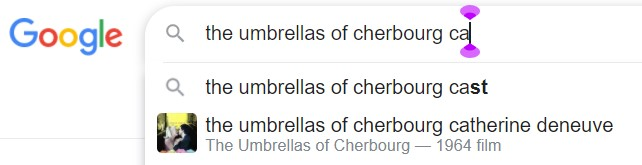

## 4. Directed graphs as bipartite graphs

Directed graphs can be represented as bipartite graphs by duplicating each node, one as source of edges and the other as destination of edges. The biadjacency matrix of the bipartite graph is simply the adjacency matrix of the directed graph. 

The PageRank scores obtained with the bipartite graph differ from those obtained with the directed graph: they correspond to the **forward-backward** random walk in the directed graph, edges being alternately followed in forward and backward directions.

## Wikipedia Vitals

In [441]:
graph = wikivitals

In [442]:
adjacency = graph.adjacency
names = graph.names

## To do

Do the same experiments as above using BiPageRank:
* List the 10 best ranked pages of Wikipedia Vitals. Give 2 rankings: one for rows, the other for columns.
* Compare with the 10 nodes of highest out-degrees and the 10 nodes of highest in-degrees, respectively.<br> Interpret the results.

In [443]:
# out scores
pagerank = BiPageRank()
pagerank.fit(adjacency)
scores_out = pagerank.scores_row_
top_pages_out = top_k(scores_out, 10)
print("Page Ranks according to their outgoing edges:\n")
for i, node in enumerate(top_pages_out):
    print(i + 1, "{:.2%}".format(scores_out[node]), names[node])

Page Ranks according to their outgoing edges:

1 0.06% Europe
2 0.06% History of the world
3 0.06% Modern history
4 0.05% France
5 0.05% Africa
6 0.05% History of art
7 0.05% United States
8 0.05% Russia
9 0.04% Asia
10 0.04% History of Europe


In [444]:
# in scores
scores_in = pagerank.scores_col_
top_pages_in = top_k(scores_in, 10)
print("Page Ranks according to their incoming edges:\n")
for i, node in enumerate(top_pages_in):
    print(i + 1, "{:.2%}".format(scores_in[node]), names[node])

Page Ranks according to their incoming edges:

1 0.53% Bibliothèque nationale de France
2 0.26% United States
3 0.20% The New York Times
4 0.19% India
5 0.19% Geographic coordinate system
6 0.19% China
7 0.17% France
8 0.17% Latin
9 0.17% United Kingdom
10 0.16% World War II


In [445]:
df_wiki["biScoresOut"] = names[top_pages_out]
df_wiki["biScoresOut_p"] = scores_out[top_pages_out]
df_wiki["biScoresIn"] = names[top_pages_in]
df_wiki["biScoresIn_p"] = scores_in[top_pages_in]

In [446]:
df_wiki

,rank,scores,scores_p,out_degree,out_degree_p,in_degree,in_degree_p,biScoresOut,biScoresOut_p,biScoresIn,biScoresIn_p
0,1,Bibliothèque nationale de France,0.004058,Europe,0.000838,Bibliothèque nationale de France,0.004377,Europe,0.000617,Bibliothèque nationale de France,0.005267
1,2,United States,0.002119,Modern history,0.000792,United States,0.002464,History of the world,0.000609,United States,0.002616
2,3,Geographic coordinate system,0.001759,History of the world,0.000792,India,0.001933,Modern history,0.000609,The New York Times,0.002020
3,4,The New York Times,0.001662,France,0.000691,China,0.001860,France,0.000523,India,0.001950
4,5,France,0.001563,Africa,0.000663,The New York Times,0.001773,Africa,0.000488,Geographic coordinate system,0.001900
5,6,India,0.001559,History of art,0.000602,France,0.001755,History of art,0.000476,China,0.001855
6,7,Latin,0.001530,Asia,0.000595,Geographic coordinate system,0.001728,United States,0.000456,France,0.001738
7,8,China,0.001473,Russia,0.000585,United Kingdom,0.001646,Russia,0.000454,Latin,0.001696
8,9,United Kingdom,0.001440,History of Europe,0.000571,World War II,0.001629,Asia,0.000437,United Kingdom,0.001692
9,10,World War II,0.001431,South America,0.000568,Latin,0.001490,History of Europe,0.000434,World War II,0.001623


In [447]:
pd.DataFrame(zip(df_wiki["out_degree"], df_wiki["biScoresOut"]))

,0,1
0,Europe,Europe
1,Modern history,History of the world
2,History of the world,Modern history
3,France,France
4,Africa,Africa
5,History of art,History of art
6,Asia,United States
7,Russia,Russia
8,History of Europe,Asia
9,South America,History of Europe


In [448]:
pd.DataFrame(zip(df_wiki["in_degree"], df_wiki["biScoresIn"]))

,0,1
0,Bibliothèque nationale de France,Bibliothèque nationale de France
1,United States,United States
2,India,The New York Times
3,China,India
4,The New York Times,Geographic coordinate system
5,France,China
6,Geographic coordinate system,France
7,United Kingdom,Latin
8,World War II,United Kingdom
9,Latin,World War II


We conclude that top degrees are very close to the top bipartite in (columns), and the top degrees out corresponds to the top bipartite out (rows). 

This result is so logical since it is how the bipartite graph built from the directed graph (a set of nodes that has out edges, and the same set of nodes with only incoming edges).

## To do

Using BiPageRank:
* List the 20 closest pages to **Picasso** in Wikipedia Vitals. 
* List the 20 closest pages to both **Cat** and **Dog** in Wikipedia Vitals.

In [450]:
picasso = 4936
pagerank = BiPageRank()
pagerank.fit(adjacency, seeds_row = {picasso: 1})

scores = pagerank.scores_row_
print("Top 20 closest pages to Picasso: (for inwards links)\n")
top_nodes = top_k(scores, 21)
for i, node in enumerate(top_nodes):
    print(i, "{:.2%}".format(scores[top_nodes[i]]), names[node])

Top 20 closest pages to Picasso: (for inwards links)

0 24.14% Pablo Picasso
1 0.38% Modernism
2 0.34% Cubism
3 0.34% Modern art
4 0.32% Abstract expressionism
5 0.32% Impressionism
6 0.32% Surrealism
7 0.31% Futurism
8 0.31% Symbolism (arts)
9 0.31% Expressionism
10 0.31% Pop art
11 0.31% Avant-garde
12 0.31% Postmodernism
13 0.31% Paul Klee
14 0.31% Dada
15 0.31% Minimalism
16 0.31% Thomas Mann
17 0.31% Modern architecture
18 0.30% Franz Kafka
19 0.30% 20th-century classical music
20 0.30% Rainer Maria Rilke


In [427]:
pagerank = BiPageRank()
pagerank.fit(adjacency, seeds_col = {cat: 0.5, dog: 0.5})

scores = pagerank.scores_col_
print("Top 20 closest pages to both Cat and Dog: (for inwards links)\n")
top_nodes = top_k(scores, 22)
for i, node in enumerate(top_nodes):
    print(i - 1, "{:.3%}".format(scores[top_nodes[i]]), names[node])

Top 20 closest pages to both Cat and Dog: (for inwards links)

-1 12.171% Dog
0 12.133% Cat
1 0.296% Taxonomy (biology)
2 0.284% Animal
3 0.265% Bibliothèque nationale de France
4 0.213% Chordate
5 0.211% Mammal
6 0.202% United States
7 0.175% Latin
8 0.154% India
9 0.150% Species
10 0.143% Cretaceous
11 0.143% China
12 0.136% Bird
13 0.134% United Kingdom
14 0.134% Jurassic
15 0.133% Triassic
16 0.132% Cambrian
17 0.132% Permian
18 0.131% Precambrian
19 0.129% The New York Times
20 0.122% Australia


* In your opinion, what is the best algorithm for finding related pages in Wikipedia, PageRank or BiPageRank?<br>
Justify your answer.

BiPageRank, because usually the more related articles tend to use common artictles to explain the things they are talking about.

An example would be a WikiPedia page talking about Newton's First Law and another talking about Newton's Second Law, both articles will be referring to pages like: 'physics', 'gravity', 'Newton', but not referring each other as much since each of them is explained separately but using common tools (pages).